Multiple Linear Regression

In [205]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

Make Regression

In [206]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [207]:
X,y = make_regression(n_samples=100, n_features=2,n_informative=2,n_targets=1,noise=50)

In [208]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
df.head()

,feature1,feature2,target
0,0.046567,0.801861,147.989831
1,-2.022201,0.315635,3.284893
2,-0.384054,-0.322417,-96.220778
3,-1.312283,0.350546,-42.390833
4,-0.887629,-0.191836,32.714388


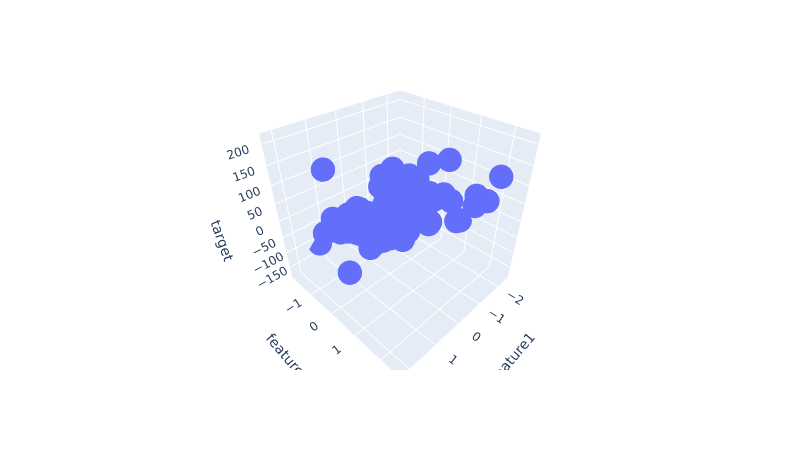

In [209]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()
gitly.show( fig )

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

In [211]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [212]:
lr.fit(X_train,y_train)

LinearRegression()

In [213]:
y_pred = lr.predict(X_test)
y_pred

array([-13.49579398,  10.70087673, -91.68348123,  89.41460947,
       -97.57941714,  29.79634993,  34.46829815, -60.64347059,
       -44.41839731, 105.0980303 , -22.39166555, -45.35164214,
        81.1289583 , 139.82820324, -12.07172478,   3.10421344,
       -23.45773119,  94.34744878,  42.77873314,  57.06579354])

In [214]:
print(f'MAE {mean_absolute_error(y_test,y_pred)}')
print(f'MSE {mean_squared_error(y_test,y_pred)}')
print(f'R2 Score {r2_score(y_test,y_pred)}')

MAE 37.813242652022154
MSE 2378.5103894660742
R2 Score 0.6258740529474891


In [215]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)

xGrid, yGrid = np.meshgrid(y,x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

z = z_final

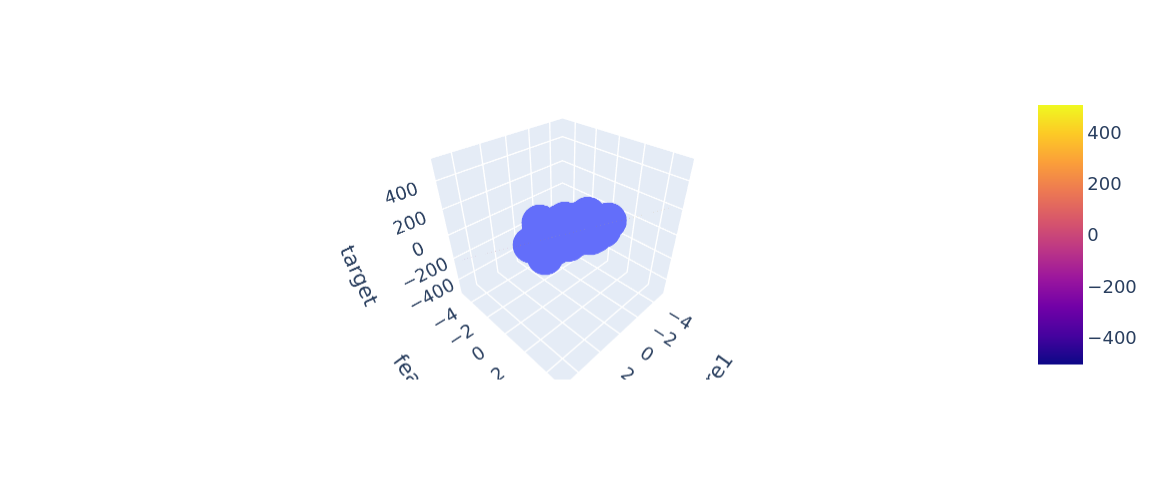

In [216]:
fig = px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.add_trace(go.Surface(x=x,y=y,z=z))
fig.show()
gitly.show(fig, height = 333, width = 777, scale = 1.5)

In [218]:
lr.coef_

array([28.94416098, 72.4546367 ])

MLR from scratch

using the load_diabetes data from sklearn


In [219]:
from sklearn.datasets import load_diabetes

In [220]:
X,y = load_diabetes(return_X_y=True)

In [221]:
X.shape,y.shape

((442, 10), (442,))

In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [223]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [224]:
reg = LinearRegression()

In [225]:
reg.fit(X_train,y_train)

LinearRegression()

In [226]:
y_pred=reg.predict(X_test)
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [227]:
r2_score(y_test,y_pred)

0.4399338661568968

In [228]:
print(f'MAE {mean_absolute_error(y_test,y_pred)}')
print(f'MSE {mean_squared_error(y_test,y_pred)}')
print(f'R2 Score {r2_score(y_test,y_pred)}')

MAE 45.213034190469024
MSE 3094.4566715660626
R2 Score 0.4399338661568968


In [229]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [230]:
reg.intercept_

151.88331005254167

Making our own Linear Regression Class

In [231]:
class MyLR:
    def __init__(self) -> None:
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self,X_train,y_train):
        # inserted 1 on pos 0
        X_train = np.insert(X_train,0,1,axis=1)

        # calc coef_
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]



    def predict(self,X_test):
        return self.intercept_ + np.dot(X_test,self.coef_)

In [232]:
lr = MyLR()

In [233]:
lr.fit(X_train,y_train)

In [234]:
y_pred = lr.predict(X_test)
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [235]:
r2_score(y_test,y_pred)

0.43993386615689634

In [236]:
print(f'MAE {mean_absolute_error(y_test,y_pred)}')
print(f'MSE {mean_squared_error(y_test,y_pred)}')
print(f'R2 Score {r2_score(y_test,y_pred)}')

MAE 45.21303419046907
MSE 3094.4566715660653
R2 Score 0.43993386615689634
